<a href="https://colab.research.google.com/github/Sreejajillella/FMML-ASSIGNMENT_LAB/blob/main/K_MeansClustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Lab by Nikunj Nawal

nikunj.nawal@research.iiit.ac.in

# K-Means

K-Means algorithm is a centroid based clustering algorithm where the sum of distances of points from the centroid of each cluster is minimized. The final output is a set of K clusters .ie. the cluster assigned to each point and the K centroids of the clusters.

### The Algorithm
> 1.   Initialize K centroids to K points randomly and set each point's initial cluster as the centroid closest to it.
2.   While the clusers are changing - \\
a. Assign the new centroids as the centroids of the points which have the same assigned cluster. \\
b. Assign the new clusters to the points as the closest centroid.
3. Return the assignments and the centroids.





### Part 1 - Implementation of KMeans and testing on Synthetic Datasets

In [1]:
# Importing necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

In [2]:
# Generating Synthetic Data

k=2
color=["darkturquoise","darkorange","teal","darkviolet","tomato", "yellowgreen","hotpink","gold"]

X,_=make_blobs(n_samples=500, n_features=2, centers=k, random_state=10)
print("Shape = " + str(X.shape))

print("Sample:")
print(X[:7])

Shape = (500, 2)
Sample:
[[ 5.83801528 -9.29715058]
 [ 5.67102739 -9.76225984]
 [ 3.15598083  5.95298368]
 [ 3.87586762  5.94663718]
 [ 3.94478532  4.85652467]
 [ 2.82983681  4.85628288]
 [ 4.99059695 -9.04869246]]


####Define all the functions & varibles needed to do clustering

In [3]:
#Create an empty dictionary to store the cluster name, centroid and points associated with the cluster.
clusters={}

def initializeClusterCentroids():
  #For each cluster, initialize its properties
  for i in range(k):
      center = np.random.randint(-8, 10, size= (X.shape[1],), )
      points = []
      
      cluster = {
          'center' : center,
          'points' : points,
          'color' : color[i]
      }
      clusters[i] = cluster #looping over clusters dictionary 

#Calculate euclidean distance between v1 and v2
def distance(v1, v2):
    return np.sum((v2-v1)**2)**0.5

def assignPointsToCluster(clusters, X):
    for ix in range(X.shape[0]):#iterate for all datapoints

        #Foe each datapoint, find the distance to k centroids
        distance_of_i = [] 
        for kx in range(k):
            d = distance(X[ix], clusters[kx]['center']) #we have find distance b/w 
            #all the point with all the five (k) cluster centers
            distance_of_i.append(d)
          
        #Based on the distances to k centroid, pick which cluster to assign it to
        #here we want find the minimum distance of cluster centers
        cluster_to_choose = np.argmin(distance_of_i)
        clusters[cluster_to_choose]['points'].append(X[ix]) 

#STEP 3: UPDATE CLUSTER CENTROIDS
def updateCluster(clusters):
    for kx in range(k):
        cluster_points = clusters[kx]['points']
        
        cluster_points = np.array(cluster_points)
        #here pts are array of list but we want array of array so
        
        if len(cluster_points)>0:
            new_center = np.mean(cluster_points, axis=0) #axis is along rows so will 
            #find mean of all the feature seprately it will give 2,0 when we have cluster pts 50,2
            clusters[kx]['center'] = new_center
            clusters[kx]['points'] = [] # clear the points in a cluster list (emptying pts)
            #as we have to do step 2 after step 3 again till not converge

In [ ]:
#We need to visualize this too. Lets define a function that can do that!
def plotclusters(clusters, plot):
    for kx in range(k):
        cluster_points = clusters[kx]['points']
        cluster_color = clusters[kx]['color']
        cluster_center = clusters[kx]['center']
        cluster_points = np.array(cluster_points)
        
        #plotting points associated /nearest to the cluster centers
        if len(cluster_points) > 0:
          plot.scatter(cluster_points[:, 0], cluster_points[:, 1], s = 2, c = cluster_color)
        
        plot.scatter(cluster_center[0], cluster_center[1], s = 250, c = cluster_color, marker="o")

We can now run and visualize how the clusters evolve.

NameError: ignored

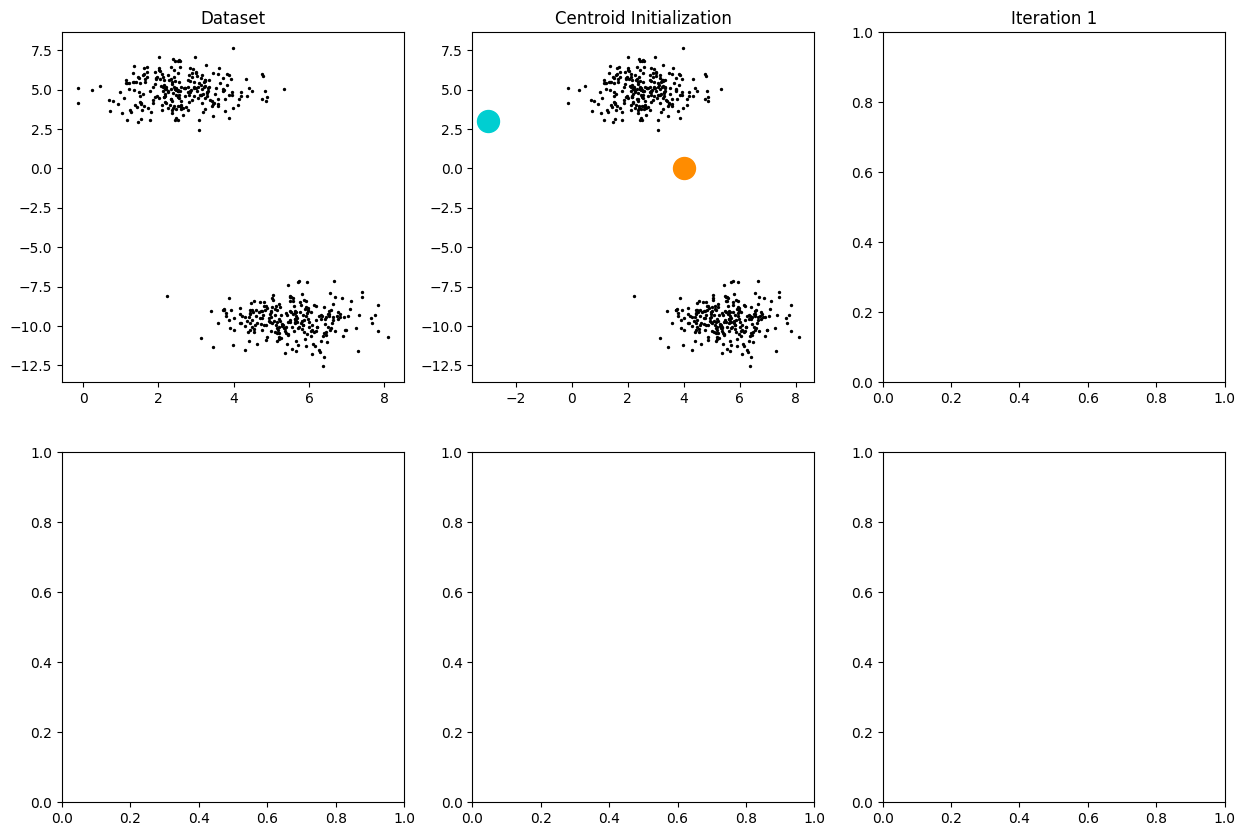

In [5]:
#Plotting the initial dataset
fig, axs = plt.subplots(2, 3)
fig.set_size_inches(15, 10)
axs[0, 0].scatter(X[:,0],X[:,1], s = 2, c = 'black')
axs[0, 0].set_title('Dataset')

np.random.seed(1)
initializeClusterCentroids()

#Now, lets plot the centroids it has initalized
axs[0, 1].set_title('Centroid Initialization')
axs[0, 1].scatter(X[:, 0], X[:, 1], s = 2, c = 'black')
for i in range(k):#for all the clusters
    center = clusters[i]['center'] #its cluster's center
    axs[0, 1].scatter(center[0], center[1], c=clusters[i]['color'], s=250, marker="o")

#CLUSTERING EPOCH 1
axs[0, 2].set_title('Iteration 1')
assignPointsToCluster(clusters, X)
plotclusters(clusters, axs[0, 2])
updateCluster(clusters)

#CLUSTERING EPOCH 2
axs[1, 0].set_title('Iteration 2')
assignPointsToCluster(clusters, X)
plotclusters(clusters, axs[1, 0])
updateCluster(clusters)

#CLUSTERING EPOCH 3
axs[1, 1].set_title('Iteration 3')
assignPointsToCluster(clusters, X)
plotclusters(clusters, axs[1, 1])
updateCluster(clusters)

#CLUSTERING EPOCH 4
axs[1, 2].set_title('Iteration 4')
assignPointsToCluster(clusters, X)
plotclusters(clusters, axs[1, 2])
updateCluster(clusters)

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()

Let us now try the same thing with different number of clusters. We will also see how initialization matters.

In [6]:
# Generating Synthetic Data

k=4
color=["darkturquoise","darkorange","teal","darkviolet","tomato", "yellowgreen","hotpink","gold"]

X,_=make_blobs(n_samples=500, n_features=2, centers=k, random_state=10)
print("Shape = " + str(X.shape))

print("Sample:")
print(X[:7])

Shape = (500, 2)
Sample:
[[ -1.31898446  -6.47826668]
 [  3.87910747  -8.2401545 ]
 [ -0.49239887  -5.28550826]
 [ -1.11543839  -4.55232113]
 [  5.14041086 -10.44771931]
 [  6.55519802 -10.28277104]
 [  1.40404168  -6.43997659]]


NameError: ignored

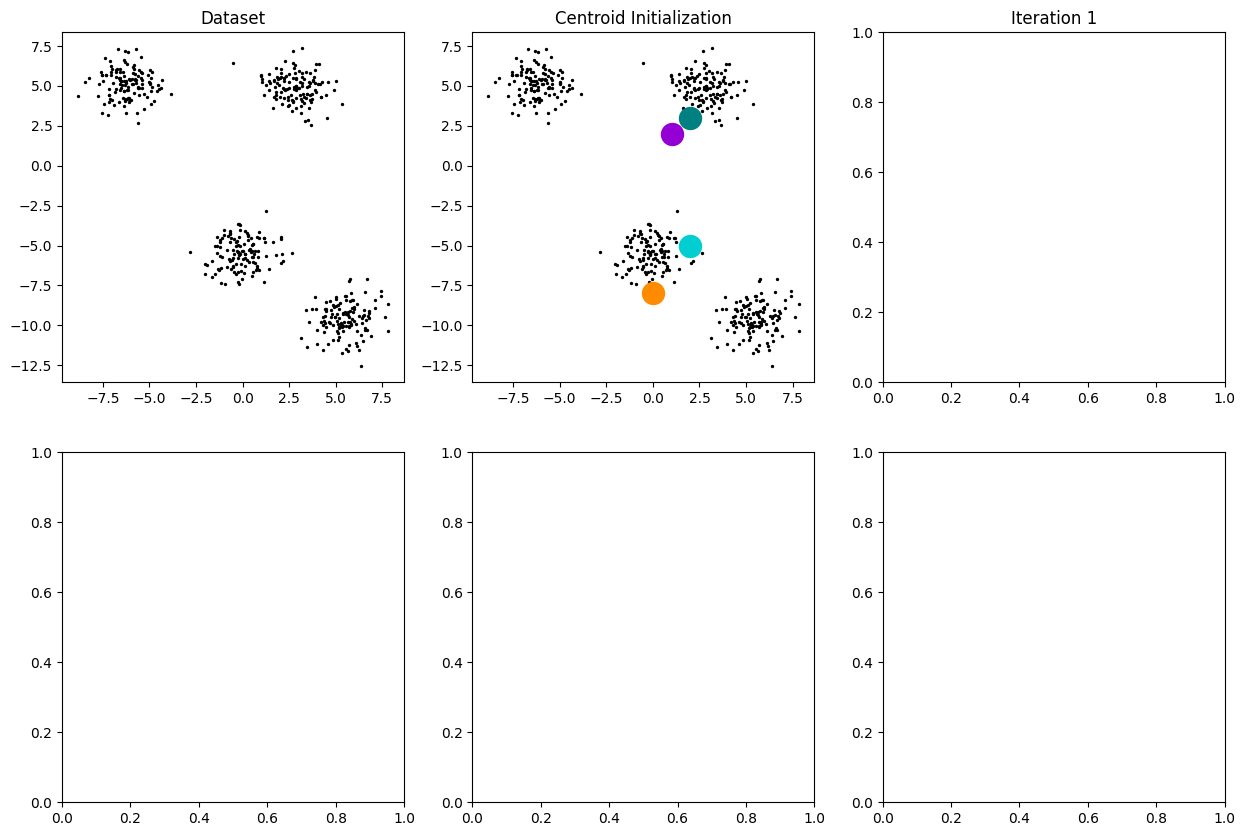

In [7]:
#Plotting the initial dataset
fig, axs = plt.subplots(2, 3)
fig.set_size_inches(15, 10)
axs[0, 0].scatter(X[:,0],X[:,1], s = 2, c = 'black')
axs[0, 0].set_title('Dataset')

## Change initialization here to 'np.random.seed(0)'
np.random.seed(3)
initializeClusterCentroids()

#Now, lets plot the centroids it has initalized
axs[0, 1].set_title('Centroid Initialization')
axs[0, 1].scatter(X[:, 0], X[:, 1], s = 2, c = 'black')
for i in range(k):#for all the clusters
    center = clusters[i]['center'] #its cluster's center
    axs[0, 1].scatter(center[0], center[1], c=clusters[i]['color'], s=250, marker="o")

#CLUSTERING EPOCH 1
axs[0, 2].set_title('Iteration 1')
assignPointsToCluster(clusters, X)
plotclusters(clusters, axs[0, 2])
updateCluster(clusters)

#CLUSTERING EPOCH 2
axs[1, 0].set_title('Iteration 2')
assignPointsToCluster(clusters, X)
plotclusters(clusters, axs[1, 0])
updateCluster(clusters)

#CLUSTERING EPOCH 3
axs[1, 1].set_title('Iteration 3')
assignPointsToCluster(clusters, X)
plotclusters(clusters, axs[1, 1])
updateCluster(clusters)

#CLUSTERING EPOCH 4
axs[1, 2].set_title('Iteration 4')
assignPointsToCluster(clusters, X)
plotclusters(clusters, axs[1, 2])
updateCluster(clusters)

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()

**As you can see, changing the random seed and hence changing the initialization has a large effect on the performance of KMeans.** 

Hence we can run our K-Means Algorithm by calling the following function with appropriate X (dataset)

In [8]:
from copy import deepcopy

def run_kmeans(k, X):
  initializeClusterCentroids()
  assignPointsToCluster(clusters, X)
  while (True):
    prev_clusters = deepcopy(clusters)
    updateCluster(clusters)
    assignPointsToCluster(clusters, X)
    if prev_clusters == clusters:
      break
  return clusters

### Kmeans in scikit-learn

Even though implementation of KMeans is easy, using libraries like sklearn allows our code to  be much simpler and faster. The next two cells show how to use it.

Check out all functionalities at https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html

In [9]:
# importing Kmeans from scikit-learn
from sklearn.cluster import KMeans

In [10]:
kmeans_demo = KMeans(n_clusters=5) #random centroid intialization
#kmeans_demo = KMeans() #What if we dont initialize the number of clusters?
#kmeans_demo = KMeans(n_clusters=5, init='k-means++') #Does smart centroid initialization help?

#Let us fit our synthetic datapoints into the kmeans object
kmeans_demo.fit(X)

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=5)

ITERATIONS TO CONVERGE = 5
CLUSTER CENTROIDS = 
[[-6.20071147  5.13256421]
 [-0.06527291 -5.46786296]
 [ 1.99346069  5.33677989]
 [ 5.49063417 -9.5824711 ]
 [ 3.45413067  4.59073007]]



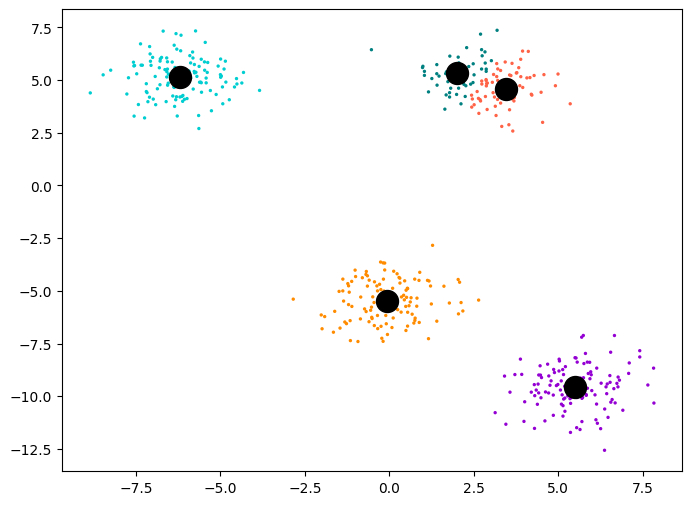

In [11]:
#Lets inspect the clustering model
print("ITERATIONS TO CONVERGE = " + str(kmeans_demo.n_iter_))
print("CLUSTER CENTROIDS = ")
print(str(kmeans_demo.cluster_centers_))
print()

#using the colours we defined for the clusters at the start
colors_toplot = []
for label in kmeans_demo.labels_:
  colors_toplot.append(color[label])

plt.scatter(X[:,0], X[:, 1], c = colors_toplot, s=2)
plt.scatter(kmeans_demo.cluster_centers_[:,0], kmeans_demo.cluster_centers_[:,1], c = 'black', s=250, marker = "o")
plt.gcf().set_size_inches(8,6)
plt.show()

### KMeans on Digits Dataset (KMeans for labelling)

Here we will attempt to use k-means to try to identify similar digits without using the original label information; this might be similar to a first step in extracting meaning from a new dataset about which you don't have any a priori label information.

In [12]:
# importing the dataset
from sklearn.datasets import load_digits

digits = load_digits()
digits.data.shape

(1797, 64)

In [13]:
# importing Kmeans from scikit-learn
from sklearn.cluster import KMeans

# Perform KMeans
kmeans = KMeans(n_clusters=10, random_state=0)
clusters = kmeans.fit_predict(digits.data)
kmeans.cluster_centers_.shape

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


(10, 64)

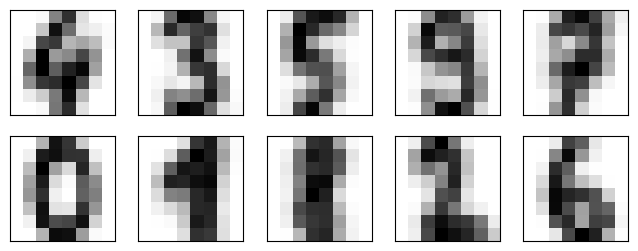

In [14]:
# We can now see how the centers of the clusters formed are

fig, ax = plt.subplots(2, 5, figsize=(8, 3))
centers = kmeans.cluster_centers_.reshape(10, 8, 8)
for axi, center in zip(ax.flat, centers):
    axi.set(xticks=[], yticks=[])
    axi.imshow(center, interpolation='nearest', cmap=plt.cm.binary)

Because k-means knows nothing about the identity of the cluster, the 0–9 labels may be permuted. We can fix this by matching each learned cluster label with the true labels found in them:

In [ ]:
from scipy.stats import mode

labels = np.zeros_like(clusters)
for i in range(10):
    mask = (clusters == i)
    labels[mask] = mode(digits.target[mask])[0]

Now we can check how accurate our unsupervised clustering was in finding similar digits within the data:

In [16]:
from sklearn.metrics import accuracy_score
accuracy_score(digits.target, labels)

0.7935447968836951

**Hence clustering algorithms like KMeans are highly effective for identifying labels for groups apriori and even a simple KMeans acheives a ~80% accuracy on digit classification.**

The confusion matrix for this looks like:

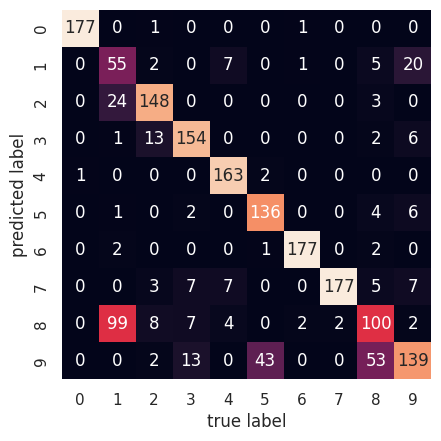

In [17]:
from sklearn.metrics import confusion_matrix
import seaborn as sns; sns.set()

mat = confusion_matrix(digits.target, labels)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=digits.target_names,
            yticklabels=digits.target_names)
plt.xlabel('true label')
plt.ylabel('predicted label');

### KMeans on Iris Dataset (Elbow Method)

We will perform KMeans on the famous Iris Dataset which has four features: sepal length, sepal width, petal length, and petal width. The fifth column is for species, which holds the value for these types of plants.

In [18]:
#Importing the neccesary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

from sklearn import datasets
import matplotlib.pyplot as plt

In [19]:
#import the dataset
iris = datasets.load_iris()
df = pd.DataFrame(iris.data, columns=['sepal_length', 'sepal_width', 'petal_length', 'petal_width'])
x = df.iloc[:, [0,1,2,3]].values
df.head(5)

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


Let us start with assigning the initial number of clusters as k=5.

In [20]:
kmeans5 = KMeans(n_clusters=5)
y_kmeans5 = kmeans5.fit_predict(x)
print(y_kmeans5)

kmeans5.cluster_centers_

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 3 0 0 0 3 0 3 3 0 3 0 3 0 0 3 0 3 0 3 0 0
 0 0 0 0 0 3 3 3 3 0 3 0 0 0 3 3 3 0 3 3 3 3 3 0 3 3 4 0 2 4 4 2 3 2 4 2 4
 4 4 0 4 4 4 2 2 0 4 0 2 0 4 2 0 0 4 2 2 2 4 0 0 2 4 4 0 4 4 4 0 4 4 4 0 4
 4 0]


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([[6.20769231, 2.85384615, 4.74615385, 1.56410256],
       [5.006     , 3.428     , 1.462     , 0.246     ],
       [7.475     , 3.125     , 6.3       , 2.05      ],
       [5.508     , 2.6       , 3.908     , 1.204     ],
       [6.52916667, 3.05833333, 5.50833333, 2.1625    ]])

How do we choose the optimal number of clusters? There’s a method called the Elbow method, which is designed to help find the optimal number of clusters in a dataset. So let’s use this method to calculate the optimum value of k. To implement the Elbow method, we need to create some Python code (shown below), and we’ll plot a graph between the number of clusters and the corresponding error value.

This graph generally ends up shaped like an elbow, hence its name:

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: F

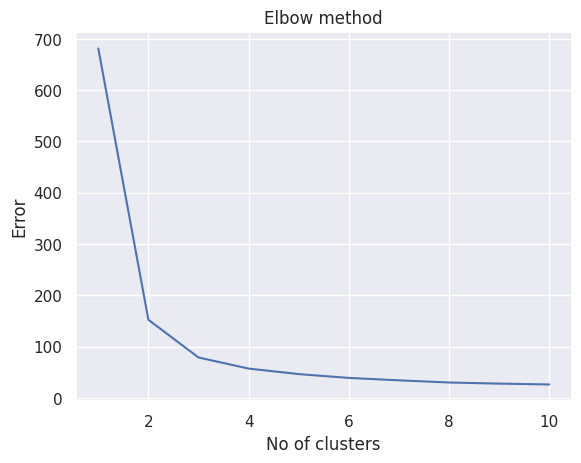

In [21]:
Error =[]
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i).fit(x)
    kmeans.fit(x)
    Error.append(kmeans.inertia_)
    
plt.plot(range(1, 11), Error)
plt.title('Elbow method')
plt.xlabel('No of clusters')
plt.ylabel('Error')
plt.show()

The output graph of the Elbow method shows that the shape of elbow is approximately formed at k=3. The optimal value of k is between 2 and 4, as the elbow-like shape is formed at k=3 in the above graph.

In [22]:
kmeans3 = KMeans(n_clusters=3)
y_kmeans3 = kmeans3.fit_predict(x)
print(y_kmeans3)

kmeans3.cluster_centers_

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 0 0 0 0 2 0 0 0 0
 0 0 2 2 0 0 0 0 2 0 2 0 2 0 0 2 2 0 0 0 0 0 2 0 0 0 0 2 0 0 0 2 0 0 0 2 0
 0 2]


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([[6.85      , 3.07368421, 5.74210526, 2.07105263],
       [5.006     , 3.428     , 1.462     , 0.246     ],
       [5.9016129 , 2.7483871 , 4.39354839, 1.43387097]])

We can now visualize the clustering in two dimensions instead of the original four.

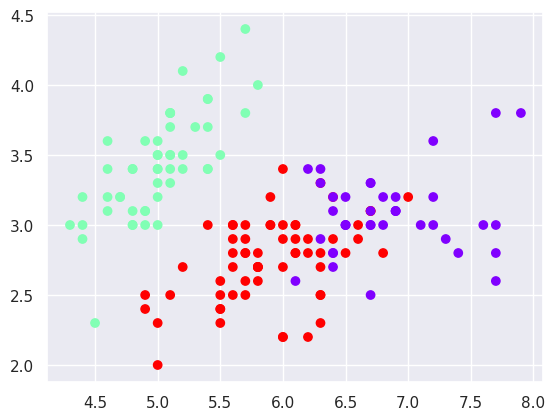

In [23]:
plt.scatter(x[:,0], x[:,1], c=y_kmeans3, cmap='rainbow')

## Points to think about

1. Is feature scaling essential for KMeans as it is for most ML algos?
2. How can we prevent initialization variation in KMeans?
3. What is the training and testing complexity of KMeans?

Answer
Yes, the scaling has significant impact on clustering algorithm. If the features are incompatible(different units in measuments eg height and weight), keeping values not scaled will make the cluster decided by the feature having higher dimension.
Reference

**ANSWER** **FOR** **2ND** **QUESTION**

Forgy Initialization: One of the faster initialization methods for k-Means. If we choose to have k clusters, the Forgy method chooses any k points from the data at random as the initial points.
Random Partition Initialization: We randomly assign each point in the data to a random cluster ID. Then, we group the points by their cluster ID and take the average (per cluster ID) to yield the initial points. Random Partition method is known to yield initial points close to the mean of the Data.
kmeans++ Initialization: This is a standard method and which generally works better than Forgy’s method and the Random Partition method for initializing k-Means. Select a random data point, then take next point farthest from the first. We do so by sampling a point from a probability distribution that is proportional to the squared distance of a point from the first center.


Even with these algoritm it is recommended to consider other points as the KMeans algorithm assumes many things.
Reference